In [1]:
import pandas as pd
import numpy as np

In [2]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler

df = pd.read_csv('option_train.csv')
print("sum of null value:\n",df.isnull().sum(),sep='')#print null
print("\nduplicated value:",df[df.duplicated()])#find duplicate value

imputer = KNNImputer(n_neighbors=5)
features_to_impute = ['Value','S', 'K', 'tau']
impute_data = df[features_to_impute]
# 使用KNN算法填充缺失值
filled_data = imputer.fit_transform(impute_data)
# 将填充后的数据替换原数据集中的缺失值
df[features_to_impute] = filled_data

# 使用箱线图检测异常值
numeric_columns = ['S', 'K', 'tau','r']
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# 根据箱线图判定异常值的范围
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#需要修正lower/upper bound，因为若Q1 - 1.5 * IQR比min还要小，lower bound需修正为min；upper bound同理
for i in numeric_columns:
    if df[i].quantile(0)>lower_bound[i]:
        lower_bound[i]=df[i].quantile(0)
    if df[i].quantile(1)<upper_bound[i]:
        upper_bound[i]=df[i].quantile(1)
        
print("\nBefore removing outliers:\n",df.describe())
# 处理异常值
df[numeric_columns] = np.where((df[numeric_columns] < lower_bound) | (df[numeric_columns] > upper_bound), df[numeric_columns].median(), df[numeric_columns])

print("\nAfter removing outliers:\n",df.describe())


sum of null value:
Value    1
S        1
K        2
tau      1
r        0
BS       0
dtype: int64

duplicated value: Empty DataFrame
Columns: [Value, S, K, tau, r, BS]
Index: []

Before removing outliers:
              Value            S            K          tau            r
count  1680.000000  1680.000000  1680.000000  1680.000000  1680.000000
mean     15.065379   440.639044   438.247619     0.437351     0.030235
std      14.034946    13.126536    23.396255     7.055457     0.000557
min       0.125000     0.000000   375.000000     0.003968     0.029510
25%       2.255003   433.863864   420.000000     0.119048     0.029820
50%      11.190967   442.525366   440.000000     0.202381     0.030130
75%      25.744375   447.320414   455.000000     0.285714     0.030540
max      60.149367   455.880619   500.000000   250.000000     0.031880

After removing outliers:
              Value            S            K          tau            r
count  1680.000000  1680.000000  1680.000000  1680.000000

In [3]:
# 读取 CSV 文件
df = pd.read_csv('option_train.csv')
df = df.dropna()

# 要检查极端值的列
columns_to_check = ['S', 'K', 'tau', 'r']

# 循环检查每一列的极端值并删除
for column in columns_to_check:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # 计算上下界
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 删除极端值
    df = df[(df[column] > lower_bound) & (df[column] < upper_bound)]

print(df)

          Value           S      K       tau        r     BS
0     21.670404  431.623898  420.0  0.341270  0.03013  Under
1      0.125000  427.015526  465.0  0.166667  0.03126   Over
2     20.691244  427.762336  415.0  0.265873  0.03116  Under
3      1.035002  451.711658  460.0  0.063492  0.02972   Over
4     39.553020  446.718974  410.0  0.166667  0.02962  Under
...         ...         ...    ...       ...      ...    ...
1674  13.586294  435.066296  425.0  0.126984  0.03054   Over
1675   1.470000  444.397163  475.0  0.273810  0.03034   Over
1676  34.927317  438.453825  410.0  0.301587  0.02972  Under
1678   0.440003  439.081203  480.0  0.293651  0.02962   Over
1679   0.410002  432.167692  465.0  0.218254  0.02993   Over

[1589 rows x 6 columns]


In [4]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['BS'] = label_encoder.fit_transform(df['BS'])
# Reverse the encoding
df['BS'] = 1 - df['BS']
print(df)

          Value           S      K       tau        r  BS
0     21.670404  431.623898  420.0  0.341270  0.03013   0
1      0.125000  427.015526  465.0  0.166667  0.03126   1
2     20.691244  427.762336  415.0  0.265873  0.03116   0
3      1.035002  451.711658  460.0  0.063492  0.02972   1
4     39.553020  446.718974  410.0  0.166667  0.02962   0
...         ...         ...    ...       ...      ...  ..
1674  13.586294  435.066296  425.0  0.126984  0.03054   1
1675   1.470000  444.397163  475.0  0.273810  0.03034   1
1676  34.927317  438.453825  410.0  0.301587  0.02972   0
1678   0.440003  439.081203  480.0  0.293651  0.02962   1
1679   0.410002  432.167692  465.0  0.218254  0.02993   1

[1589 rows x 6 columns]


In [5]:
# 读取 CSV 文件
df2 = pd.read_csv('option_test_wolabel.csv')
print(df2)

               S    K       tau        r
0     431.618600  460  0.293651  0.03147
1     432.633296  420  0.182540  0.03147
2     432.633296  430  0.182540  0.03147
3     431.618600  415  0.293651  0.03147
4     434.772855  420  0.043651  0.03147
...          ...  ...       ...      ...
1115  440.067417  435  0.182540  0.02962
1116  439.081203  485  0.293651  0.02962
1117  439.081203  475  0.293651  0.02962
1118  442.490015  420  0.043651  0.02962
1119  440.067417  430  0.182540  0.02962

[1120 rows x 4 columns]


In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

# 准备特征（X）和标签（y）
X = df[['S', 'K', 'tau', 'r']].values  # 选择特征列作为 X
y = df['BS'].values  # BS 列作为目标变量 y

# 初始化 StandardScaler
scaler = StandardScaler()

# 对特征进行标准化
X_scaled = scaler.fit_transform(X)
# 初始化 LDA 模型
lda = LinearDiscriminantAnalysis()

# 进行 K 折交叉验证
k = 5 # 选择 K = 5 折交叉验证
cv_scores = cross_val_score(lda, X_scaled, y, cv=k)

# 打印交叉验证得分
print("Cross-validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Cross-validation Scores: [0.92138365 0.9245283  0.91509434 0.91194969 0.89589905]
Mean Accuracy: 0.9137710056941055


In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# 准备特征（X）和标签（y）
X = df[['S', 'K', 'tau', 'r']].values  # 选择特征列作为 X
y = df['BS'].values  # BS 列作为目标变量 y

# 初始化 StandardScaler
scaler = StandardScaler()

# 对特征进行标准化
X_scaled = scaler.fit_transform(X)

# 初始化逻辑回归模型（使用L1和L2正则化）
logreg_l1 = LogisticRegression(penalty='l1', solver='liblinear')
logreg_l2 = LogisticRegression(penalty='l2', solver='liblinear')

# 进行 K 折交叉验证并输出得分
k = 5  # 选择 K = 5 折交叉验证
cv_scores_l1 = cross_val_score(logreg_l1, X_scaled, y, cv=k)
cv_scores_l2 = cross_val_score(logreg_l2, X_scaled, y, cv=k)

# 打印交叉验证得分（L1和L2正则化）
print("Cross-validation Scores (Logistic Regression with L1 regularization):", cv_scores_l1)
print("Mean Accuracy (Logistic Regression with L1 regularization):", cv_scores_l1.mean())
print("Cross-validation Scores (Logistic Regression with L2 regularization):", cv_scores_l2)
print("Mean Accuracy (Logistic Regression with L2 regularization):", cv_scores_l2.mean())


Cross-validation Scores (Logistic Regression with L1 regularization): [0.92767296 0.9245283  0.90880503 0.91194969 0.89905363]
Mean Accuracy (Logistic Regression with L1 regularization): 0.9144019205206039
Cross-validation Scores (Logistic Regression with L2 regularization): [0.93081761 0.92138365 0.90880503 0.91194969 0.89589905]
Mean Accuracy (Logistic Regression with L2 regularization): 0.9137710056941055


In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# 准备特征（X）和标签（y）
X = df[['S', 'K', 'tau', 'r']].values  # 选择特征列作为 X
y = df['BS'].values  # BS 列作为目标变量 y

# 初始化 StandardScaler
scaler = StandardScaler()

# 对特征进行标准化
X_scaled = scaler.fit_transform(X)

# 初始化 KNN 模型并指定参数
knn = KNeighborsClassifier(n_neighbors=15, weights='distance', metric='minkowski')

# 进行 K 折交叉验证
k = 5  # 选择 K = 5 折交叉验证
cv_scores = cross_val_score(knn, X_scaled, y, cv=k)

# 打印交叉验证得分
print("Cross-validation Scores (KNN):", cv_scores)
print("Mean Accuracy (KNN):", cv_scores.mean())


Cross-validation Scores (KNN): [0.94025157 0.93081761 0.93710692 0.93396226 0.91798107]
Mean Accuracy (KNN): 0.9320238874670158


In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# 准备特征（X）和标签（y）
X = df[['S', 'K', 'tau', 'r']].values  # 选择特征列作为 X
y = df['BS'].values  # BS 列作为目标变量 y

# 初始化 StandardScaler
scaler = StandardScaler()

# 对特征进行标准化
X_scaled = scaler.fit_transform(X)

# 初始化 KNN 模型并指定参数
knn = KNeighborsClassifier(n_neighbors=15, weights='distance', metric='minkowski')

# 在整个训练集上拟合模型
knn.fit(X_scaled, y)

# 现在，你可以使用拟合好的模型对新的数据集（例如，df2）进行预测
X_df2 = df2[['S', 'K', 'tau', 'r']].values  # 选择特征列作为 X
X_scaled_df2 = scaler.transform(X_df2)  # 使用相同的标准化器对 df2 进行标准化

# 进行 K 折交叉验证并获取预测结果
k = 5  # 选择 K = 5 折交叉验证
y_pred_cv = cross_val_predict(knn, X_scaled, y, cv=k)

# 计算分类错误率
classification_error_cv = 1 - accuracy_score(y, y_pred_cv)
print("Classification Error (KNN - Cross Validation):", classification_error_cv)


# 使用 knn 模型进行预测
y_pred_df2 = knn.predict(X_scaled_df2)

# 将预测结果添加到 df2 中
df2['Predicted_BS'] = y_pred_df2
print(df2)
# 将结果保存到 CSV 文件
df2.to_csv('p1.csv', index=False)


Classification Error (KNN - Cross Validation): 0.06796727501573319
               S    K       tau        r  Predicted_BS
0     431.618600  460  0.293651  0.03147             1
1     432.633296  420  0.182540  0.03147             0
2     432.633296  430  0.182540  0.03147             1
3     431.618600  415  0.293651  0.03147             0
4     434.772855  420  0.043651  0.03147             0
...          ...  ...       ...      ...           ...
1115  440.067417  435  0.182540  0.02962             1
1116  439.081203  485  0.293651  0.02962             1
1117  439.081203  475  0.293651  0.02962             1
1118  442.490015  420  0.043651  0.02962             0
1119  440.067417  430  0.182540  0.02962             0

[1120 rows x 5 columns]


In [19]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# 准备特征（X）和标签（y）
X = df[['S', 'K', 'tau', 'r']].values  # 选择特征列作为 X
y = df['BS'].values  # BS 列作为目标变量 y

# 初始化 StandardScaler
scaler = StandardScaler()

# 对特征进行标准化
X_scaled = scaler.fit_transform(X)

# 初始化 SVM 模型并指定参数
svm = SVC(kernel='rbf', C=7) # 你可以调整参数，例如 kernel 和 C

# 进行 K 折交叉验证并获取预测结果
k = 5  # 选择 K = 5 折交叉验证
y_pred_cv_svm = cross_val_predict(svm, X_scaled, y, cv=k)

# 计算分类错误率
classification_error_cv_svm = 1 - accuracy_score(y, y_pred_cv_svm)
print("Classification Error (SVM - Cross Validation):", classification_error_cv_svm)

# 在整个训练集上拟合 SVM 模型
svm.fit(X_scaled, y)

# 现在，你可以使用拟合好的模型对新的数据集（例如，df2）进行预测
X_df2 = df2[['S', 'K', 'tau', 'r']].values  # 选择特征列作为 X
X_scaled_df2 = scaler.transform(X_df2)  # 使用相同的标准化器对 df2 进行标准化

# 使用 SVM 模型进行预测
y_pred_df2_svm = svm.predict(X_scaled_df2)

# 将预测结果添加到 df2 中
df2['Predicted_BS'] = y_pred_df2_svm
print(df2)
# 将结果保存到 CSV 文件
df2.to_csv('p2.csv', index=False)


Classification Error (SVM - Cross Validation): 0.060415355569540585
               S    K       tau        r  Predicted_BS
0     431.618600  460  0.293651  0.03147             1
1     432.633296  420  0.182540  0.03147             0
2     432.633296  430  0.182540  0.03147             0
3     431.618600  415  0.293651  0.03147             0
4     434.772855  420  0.043651  0.03147             0
...          ...  ...       ...      ...           ...
1115  440.067417  435  0.182540  0.02962             1
1116  439.081203  485  0.293651  0.02962             1
1117  439.081203  475  0.293651  0.02962             1
1118  442.490015  420  0.043651  0.02962             0
1119  440.067417  430  0.182540  0.02962             0

[1120 rows x 5 columns]


In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# 准备特征（X）和标签（y）
X = df[['S', 'K', 'tau', 'r']].values  # 选择特征列作为 X
y = df['BS'].values  # BS 列作为目标变量 y

# 初始化 StandardScaler
scaler = StandardScaler()

# 对特征进行标准化
X_scaled = scaler.fit_transform(X)

# 初始化随机森林模型并进行 K 折交叉验证
random_forest = RandomForestClassifier(n_estimators=280)

cv_scores_rf = cross_val_score(random_forest, X_scaled, y, cv=5)

# 打印交叉验证得分（随机森林）
print("Cross-validation Scores (Random Forest):", cv_scores_rf)
print("Mean Accuracy (Random Forest):", cv_scores_rf.mean())


Cross-validation Scores (Random Forest): [0.94654088 0.93710692 0.93081761 0.93710692 0.91798107]
Mean Accuracy (Random Forest): 0.9339106799198461


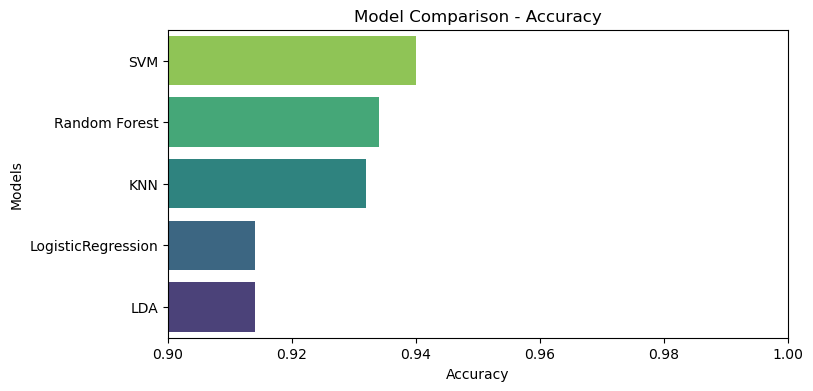

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# 模型名称
models = ['LDA', 'LogisticRegression', 'KNN', 'Random Forest', 'SVM']

# 某个性能指标，比如准确性
accuracy = [0.914, 0.914, 0.932, 0.934, 0.94]

# 创建横向条形图，调整对比度
plt.figure(figsize=(8, 4))  # 调整图表大小
sns.barplot(x=accuracy, y=models, palette='viridis', orient='h')

# 添加标签和标题
plt.xlabel('Accuracy')
plt.ylabel('Models')
plt.title('Model Comparison - Accuracy')

# 反转y轴
plt.gca().invert_yaxis()
plt.xlim(0.9, 1.0)

# 显示图表
plt.show()


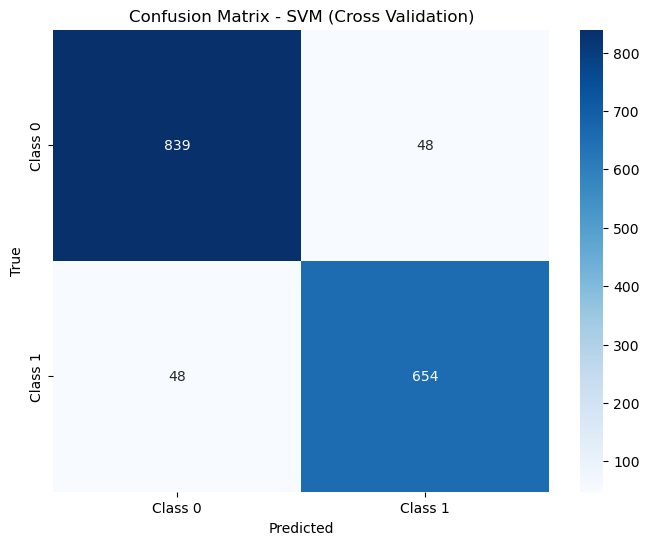

In [33]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# 准备特征（X）和标签（y）
X = df[['S', 'K', 'tau', 'r']].values
y = df['BS'].values

# 初始化 StandardScaler
scaler = StandardScaler()

# 对特征进行标准化
X_scaled = scaler.fit_transform(X)

# 初始化 SVM 模型并指定参数
svm = SVC(kernel='rbf', C=7)

# 进行 K 折交叉验证并获取预测结果
k = 5
y_pred_cv_svm = cross_val_predict(svm, X_scaled, y, cv=k)

# 计算混淆矩阵
conf_matrix = confusion_matrix(y, y_pred_cv_svm)

# 创建混淆矩阵热图进行可视化
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])

plt.title('Confusion Matrix - SVM (Cross Validation)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


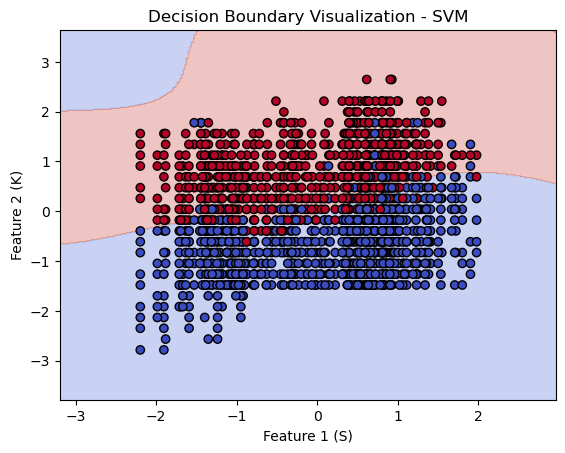

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 准备特征（X）和标签（y）
X = df[['S', 'K']].values  # 选择两个特征作为 X
y = df['BS'].values

# 初始化 StandardScaler
scaler = StandardScaler()

# 对特征进行标准化
X_scaled = scaler.fit_transform(X)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 初始化 SVM 模型并拟合
svm = SVC(kernel='rbf', C=7)
svm.fit(X_train, y_train)

# 绘制决策边界
h = .02  # 步长
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 绘制决策边界和训练点
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k', marker='o')

plt.title('Decision Boundary Visualization - SVM')
plt.xlabel('Feature 1 (S)')
plt.ylabel('Feature 2 (K)')
plt.show()


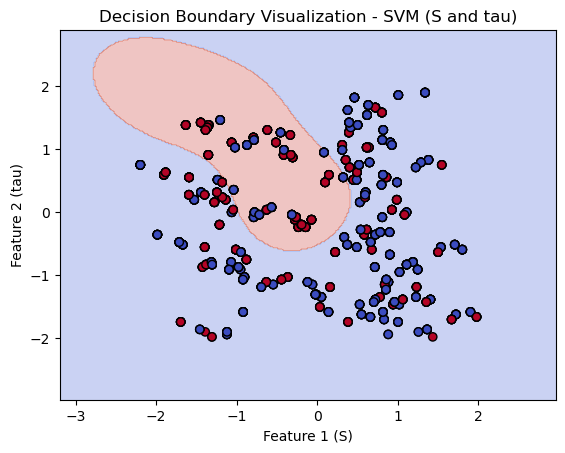

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 准备特征（X）和标签（y）
X = df[['S', 'tau']].values  # 选择两个特征作为 X
y = df['BS'].values

# 初始化 StandardScaler
scaler = StandardScaler()

# 对特征进行标准化
X_scaled = scaler.fit_transform(X)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 初始化 SVM 模型并拟合
svm = SVC(kernel='rbf', C=7)
svm.fit(X_train, y_train)

# 绘制决策边界
h = .02  # 步长
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 绘制决策边界和训练点
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k', marker='o')

plt.title('Decision Boundary Visualization - SVM (S and tau)')
plt.xlabel('Feature 1 (S)')
plt.ylabel('Feature 2 (tau)')
plt.show()


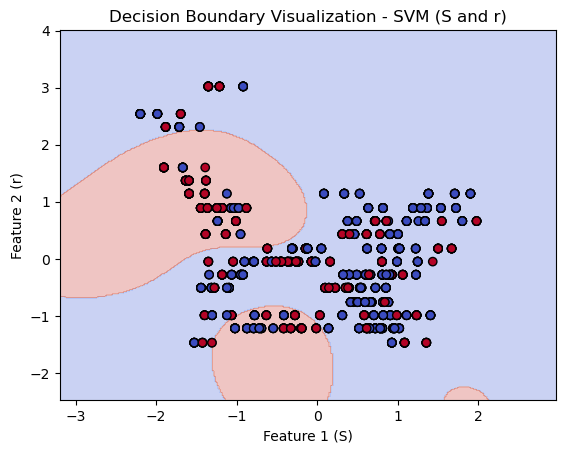

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 准备特征（X）和标签（y）
X = df[['S', 'r']].values  # 选择两个特征作为 X
y = df['BS'].values

# 初始化 StandardScaler
scaler = StandardScaler()

# 对特征进行标准化
X_scaled = scaler.fit_transform(X)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 初始化 SVM 模型并拟合
svm = SVC(kernel='rbf', C=7)
svm.fit(X_train, y_train)

# 绘制决策边界
h = .02  # 步长
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 绘制决策边界和训练点
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k', marker='o')

plt.title('Decision Boundary Visualization - SVM (S and r)')
plt.xlabel('Feature 1 (S)')
plt.ylabel('Feature 2 (r)')
plt.show()


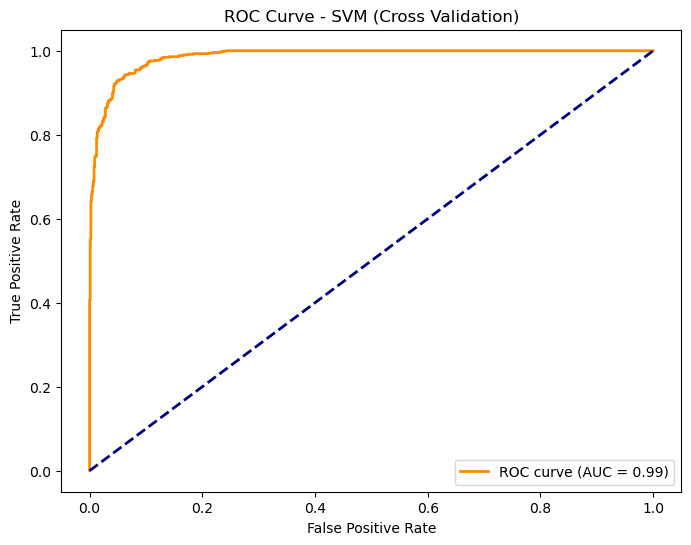

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc

# 准备特征（X）和标签（y）
X = df[['S', 'K', 'tau', 'r']].values
y = df['BS'].values

# 初始化 StandardScaler
scaler = StandardScaler()

# 对特征进行标准化
X_scaled = scaler.fit_transform(X)

# 初始化 SVM 模型并拟合
svm = SVC(kernel='rbf', C=7, probability=True)

# 进行 K 折交叉验证并获取预测概率
k = 5
y_prob_cv_svm = cross_val_predict(svm, X_scaled, y, cv=k, method='predict_proba')

# 计算绘制 ROC 曲线所需的各种指标
fpr, tpr, thresholds = roc_curve(y, y_prob_cv_svm[:, 1])
roc_auc = auc(fpr, tpr)

# 绘制 ROC 曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM (Cross Validation)')
plt.legend(loc='lower right')
plt.show()


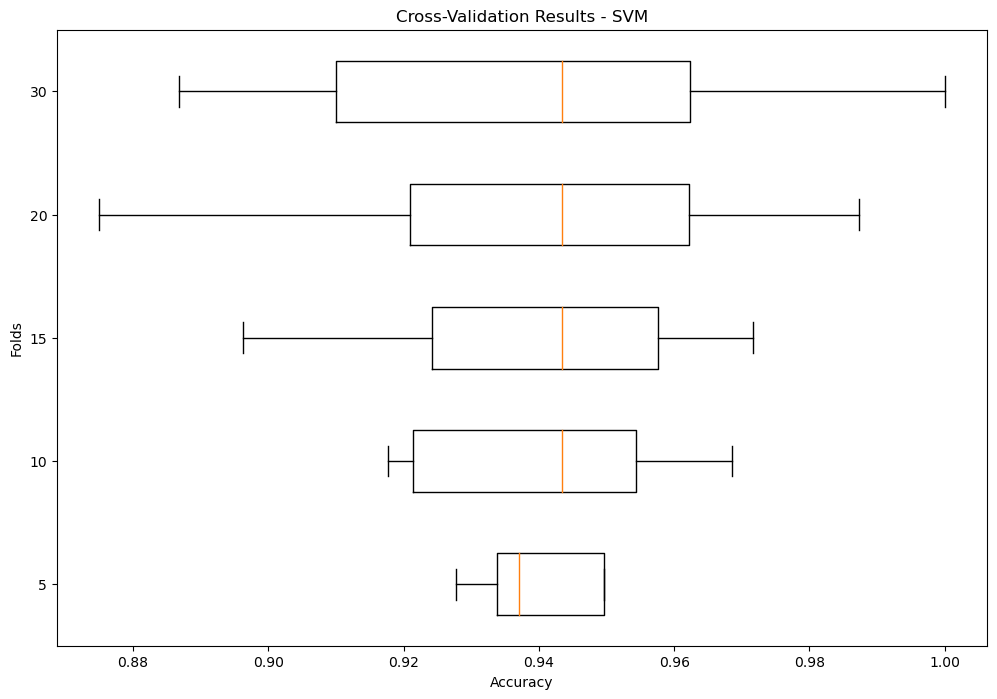

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

# 准备特征（X）和标签（y）
X = df[['S', 'K', 'tau', 'r']].values  # 选择特征列作为 X
y = df['BS'].values  # BS 列作为目标变量 y

# 初始化 StandardScaler
scaler = StandardScaler()

# 对特征进行标准化
X_scaled = scaler.fit_transform(X)

# 不同折数
folds = [5, 10, 15, 20, 30]

# 存储交叉验证结果
cv_results = []

# 进行交叉验证并记录结果
for fold in folds:
    svm = SVC(kernel='rbf', C=7)
    scores = cross_val_score(svm, X_scaled, y, cv=fold, scoring='accuracy')
    cv_results.append(scores)

# 绘制箱线图
plt.figure(figsize=(12, 8))
plt.boxplot(cv_results, labels=folds, vert=False)
plt.title('Cross-Validation Results - SVM')
plt.xlabel('Accuracy')
plt.ylabel('Folds')
plt.show()


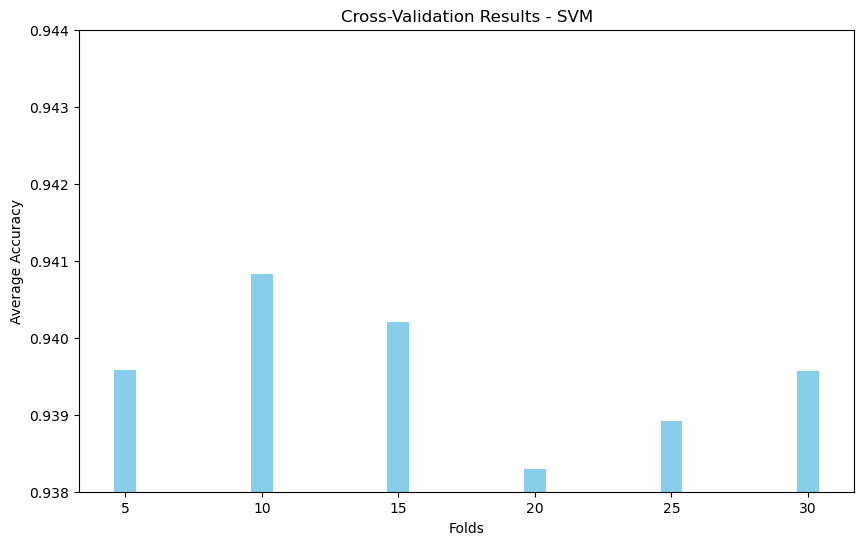

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

# 准备特征（X）和标签（y）
X = df[['S', 'K', 'tau', 'r']].values  # 选择特征列作为 X
y = df['BS'].values  # BS 列作为目标变量 y

# 初始化 StandardScaler
scaler = StandardScaler()

# 对特征进行标准化
X_scaled = scaler.fit_transform(X)

# 不同折数
folds = [5, 10, 15, 20,25, 30]

# 存储交叉验证结果
cv_results = []

# 进行交叉验证并记录结果
for fold in folds:
    svm = SVC(kernel='rbf', C=7)
    scores = cross_val_score(svm, X_scaled, y, cv=fold, scoring='accuracy')
    cv_results.append(np.mean(scores))

# 绘制柱状图
plt.figure(figsize=(10, 6))
plt.bar(folds, cv_results, color='skyblue')
plt.title('Cross-Validation Results - SVM')
plt.xlabel('Folds')
plt.ylabel('Average Accuracy')
plt.ylim(0.938, 0.944)
plt.show()


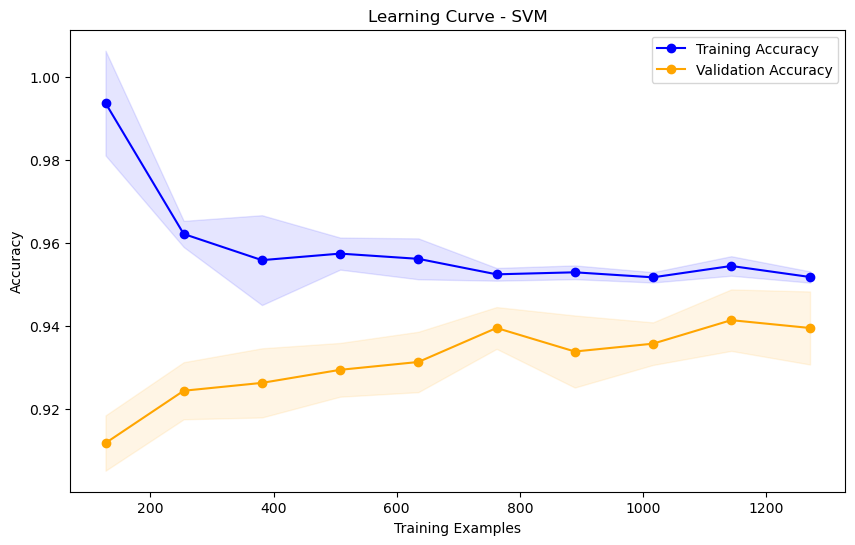

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler

# 准备特征（X）和标签（y）
X = df[['S', 'K', 'tau', 'r']].values  # 选择特征列作为 X
y = df['BS'].values  # BS 列作为目标变量 y

# 初始化 StandardScaler
scaler = StandardScaler()

# 对特征进行标准化
X_scaled = scaler.fit_transform(X)

# 初始化 SVM 模型
svm = SVC(kernel='rbf', C=7)

# 绘制学习曲线
train_sizes, train_scores, test_scores = learning_curve(svm, X_scaled, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# 计算性能的平均值和标准差
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# 绘制学习曲线图
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='orange')
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training Accuracy')
plt.plot(train_sizes, test_scores_mean, 'o-', color='orange', label='Validation Accuracy')
plt.title('Learning Curve - SVM')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()
